In [293]:
import pandas as pd
import numpy as np
import altair as alt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
from collections import Counter
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [297]:
stopWords = set(stopwords.words('english'))
ps = PorterStemmer()
wnl = nltk.WordNetLemmatizer()

def process_text(text):
    text = text.lower().replace('-', ' ')
    words = word_tokenize(text)
    words = [ps.stem(wnl.lemmatize(word)) for word in words if word not in stopWords]
    return words

def generate_wordcloud(text_col):
    all_text = []
    for text in text_col:
        all_text.extend(text)
    wc = WordCloud()
    wc.generate(' '.join(all_text))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')
    plt.show()

In [298]:
file = pd.read_csv('data/experiences.csv')

In [299]:
file.head()

,page_id,author,title,text,substance,weight,age,gender,dose_chart,exp_year,date_published,views
0,1,Johnny Blaze,An Unforgettable Ride!,"\nFinally friday arrives, i bought my 30$ merc...",Ecstasy,NaN,[],[],"{'times': ['0:00', '0:45'], 'amounts': ['0.5 t...",2000,"May 30, 2000",77735
1,2,SpEcK,A Trip to Remember....If I Could!,\nAt first it was just another rave with my cr...,"MDMA, Mushrooms, Cannabis & Opium",200 lb,[],['Male'],"{'times': ['DOSE:', '\xa0', '\xa0'], 'amounts'...",2000,"May 30, 2000",40071
2,3,e4me&u,Lost for 20,\nI've rolled about 10 times before this exper...,Ecstasy,145 lb,[],['Male'],"{'times': ['DOSE:'], 'amounts': ['1 tablet'], ...",2000,"May 30, 2000",6116
3,4,Elfstone,Spectrum of Effects,\n\nI have had the opportunity to try 2C-T-7 o...,2C-T-7,180 lb,[],['Male'],"{'times': ['DOSE:'], 'amounts': ['37 mg'], 'me...",2000,"May 31, 2000",6140
4,5,God,2CT Heaven,\n\nHaving read some accounts of nausea on 2-C...,2C-T-7,160 lb,[],[],"{'times': ['DOSE:'], 'amounts': ['25 mg'], 'me...",2000,"May 31, 2000",8432


In [300]:
file['gender'] = file['gender'].str.replace('[', '').str.replace(']', '').str.replace("'", '')
file['substance'] = file['substance'].apply(lambda x: x.split(' ')[0].lower())
file['text2'] = file['text'].apply(process_text)

In [301]:
def process_text(text):
    text = text.lower().replace('-', ' ')
    words = word_tokenize(text)
    words = [ps.stem(wnl.lemmatize(word)) for word in words if word not in stopWords]
    return words

# process_text(file['text'].iloc[10])

In [121]:
# viewing top substances
# some substances appear twice under different labels:
# MDMA - MDMA (Ecstasy) 
# Mushrooms - Mushrooms - P. cubensis
file['substance'] = file['substance'].apply(lambda x: x.split(' ')[0].lower())
substances = file['substance'].value_counts()
substances[:15]

ecstasy            194
lsd                192
salvia             148
dxm                127
mushrooms          118
cannabis           106
nutmeg              85
2c-t-7              78
cocaine             77
morning             63
mdma                50
5-meo-dipt          49
datura              46
methamphetamine     41
nitrous             39
Name: substance, dtype: int64

In [122]:
file['gender'].value_counts()

Male      1297
           723
Female     261
Name: gender, dtype: int64

In [130]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [302]:
all_text = []
for text in file['text2']:
    all_text.extend(text)

In [303]:
word_counts = Counter(all_text)

In [304]:
freq_words = np.array(list(word_counts.keys()))[np.array(list(word_counts.values())) >=10]

In [305]:
freq_words

array(['final', 'friday', 'arriv', ..., 'gigi', 'g/f', 'mitch'],
      dtype='<U133')

In [306]:
len(word_counts.keys())

29040

In [324]:
dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))

{'.': 88272,
 ',': 76096,
 "n't": 8553,
 ')': 7776,
 'like': 7749,
 '(': 7494,
 "'": 7016,
 'time': 6992,
 'feel': 6924,
 'felt': 5310,
 'would': 5191,
 'one': 5035,
 'could': 5031,
 'friend': 5016,
 "'s": 4640,
 'go': 4587,
 'get': 4501,
 'experi': 4479,
 'trip': 4275,
 '>': 4258,
 '<': 4174,
 '!': 4132,
 'start': 3918,
 'tri': 3851,
 'hour': 3739,
 '...': 3521,
 'back': 3416,
 'thing': 3390,
 'effect': 3324,
 'around': 3304,
 'look': 3172,
 'realli': 3044,
 'take': 3037,
 ':': 2926,
 'think': 2891,
 'seem': 2859,
 'much': 2858,
 'thought': 2856,
 'still': 2838,
 'day': 2817,
 'went': 2800,
 'got': 2773,
 'first': 2746,
 'took': 2584,
 'peopl': 2580,
 'drug': 2520,
 'know': 2512,
 'smoke': 2481,
 'even': 2458,
 'minut': 2428,
 'good': 2419,
 'night': 2395,
 'see': 2383,
 'littl': 2309,
 'want': 2285,
 'way': 2256,
 'decid': 2218,
 'use': 2200,
 'come': 2168,
 'bodi': 2153,
 'eye': 2041,
 '?': 2023,
 'never': 2009,
 'two': 1994,
 "'m": 1983,
 'someth': 1977,
 'mind': 1955,
 'also': 192

In [308]:
sorted(word_counts.keys())

['!',
 '#',
 '$',
 '%',
 '&',
 "'",
 "''",
 "'/'can",
 "'/pub/us",
 "'000",
 "'053",
 "'10",
 "'1000",
 "'100g",
 "'10:51",
 "'12/25/94",
 "'12:01am",
 "'17",
 "'1999",
 "'2001",
 "'25",
 "'30",
 "'3d",
 "'48th",
 "'50",
 "'500",
 "'58",
 "'5ht2",
 "'60",
 "'69",
 "'6th",
 "'70",
 "'72",
 "'76",
 "'7th",
 "'80",
 "'86'ed",
 "'87",
 "'89",
 "'8loz",
 "'8mm",
 "'90",
 "'95",
 "'96",
 "'97",
 "'99",
 "'a",
 "'aaaagggghhhhuuuuuhhhhhhhuuuuggguuhhhh",
 "'aah",
 "'abduct",
 "'abl",
 "'abnorm",
 "'abras",
 "'absent",
 "'absinth",
 "'abus",
 "'acceler",
 "'accept",
 "'accompani",
 "'accur",
 "'aceton",
 "'acid",
 "'acidwarp",
 "'actual",
 "'ad",
 "'adderal",
 "'addict",
 "'advanc",
 "'affect",
 "'afraid",
 "'after",
 "'afterglow",
 "'again",
 "'agent",
 "'ah",
 "'ahhh",
 "'ahhhh",
 "'air",
 "'airplan",
 "'alarm",
 "'alert",
 "'algo",
 "'alien",
 "'aliv",
 "'all",
 "'alley",
 "'almas'",
 "'almost",
 "'alright",
 "'alright'",
 "'alter",
 "'altern",
 "'although",
 "'alway",
 "'am",
 "'amazonian",


In [309]:
counts = CountVectorizer(vocabulary=set(freq_words))
corpus = [' '.join(x) for x in file['text2']]
tfidf = TfidfTransformer()

In [310]:
a = counts.transform(corpus).toarray()

In [311]:
a

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [312]:
X = tfidf.fit_transform(a)

In [313]:
np.unique(X.todense()[0])

matrix([[0.        , 0.        , 0.        , ..., 0.20496399, 0.24704197,
         0.2961959 ]])

In [319]:
model = NMF(n_components=2, init='random')
W = model.fit_transform(X)
H = model.components_

In [320]:
W.shape

(2281, 2)

In [329]:
# H[0].sort()
np.array(list(counts.vocabulary))[H[0].argsort()][::-1][:20]

array(['muscl', 'flyshroom', 'n', 'sharpen', 'beyond', 'park', 'manipul',
       'dumb', 'absurd', 'accur', 'hmmm', 'uncl', 'freon', 'pronounc',
       'exhilar', 'eachoth', 'seal', 'lighthead', 'chain', 'appear'],
      dtype='<U73')

In [330]:
np.array(list(counts.vocabulary))[H[1].argsort()][::-1][:20]

array(['overnight', 'chore', 'absurd', 'chain', 'read', 'alot', 'park',
       'enchant', 'flyshroom', 'pile', 'pothead', 'sharpen', 'crappi',
       'seal', 'everyon', 'hmmm', 'screw', 'sent', 'druggi',
       'tachycardia'], dtype='<U73')

In [323]:
np.array(list(counts.vocabulary))[H[2].argsort()][::-1][:10]

IndexError: index 2 is out of bounds for axis 0 with size 2

In [264]:
H[:,3760]

array([1.0618434 , 0.42661947, 0.3173635 ])

In [263]:
list(counts.vocabulary).index('knowledge')

3760

In [198]:
np.array(list(counts.vocabulary))

array(['mycologist', 'sait', 'extract', ..., 'hordes', '2-liter',
       'passato'], dtype='<U133')

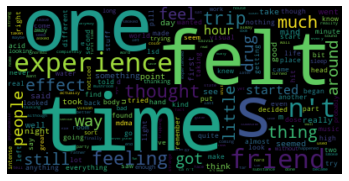

In [123]:
generate_wordcloud(file[file['gender'] == 'Male']['text2'])

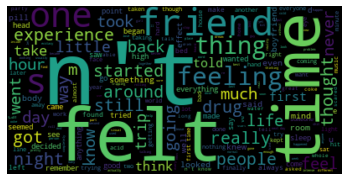

In [124]:
generate_wordcloud(file[file['gender'] == 'Female']['text2'])

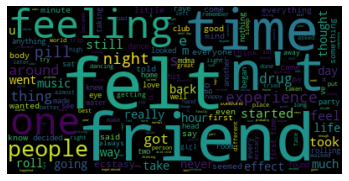

In [125]:
generate_wordcloud(file[file['substance'] == 'ecstasy']['text2'])

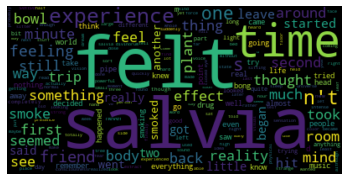

In [126]:
generate_wordcloud(file[file['substance'] == 'salvia']['text2'])

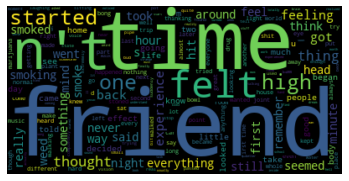

In [127]:
generate_wordcloud(file[file['substance'] == 'cannabis']['text2'])

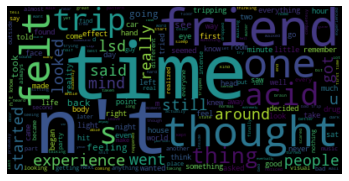

In [128]:
generate_wordcloud(file[file['substance'] == 'lsd']['text2'])